$\#\#\#\#\#\#\#$ Libraries $\#\#\#\#\#\#\#$

In [309]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

import mysql.connector 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

To complete this exercise we will be using the data from [this web](https://www.sqltutorial.org/sql-views/), since provides a data base with content that is more easy to write down by hand, compared with the database from [W3Schools](https://www.w3schools.com/sql/trysql.asp?filename=trysql_op_and).


> I had found a webpage: dumbdata.com, the data there is akward at best ==> if you make it generate age and birth dates they don't correspond!

# Nivell 1

## Exercici 1: Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python



The database we want to do is the following:

We have created the database, tables (filled), and relationships with the workbench.

From here we will follow the steps done in W3Schools to connect and get the database. 

To connect mySQL to python we will use:

In [310]:
mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'izzy',
    password = 'password'
)

mydb

Now let's check the database we have done with the workbench:

In [311]:
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('HRdata',)
('information_schema',)
('mysql',)
('performance_schema',)
('sys',)


We can see that our database is the first one: HRdata. So, we redo the connection since now we have the database name:

In [312]:
mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'izzy',
    password = 'password',
    database = 'HRdata'
)

mydb

Now we have the data loaded:

In [313]:
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES")

for x in mycursor:
    print(x)

('country',)
('department',)
('dependent',)
('employee',)
('job',)
('location',)
('region',)


And also we can show the tables in the database.

In [314]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM region")
table1 = mycursor.fetchall()

for x in table1:
    print(x)

(1, 'Europe')
(2, 'Americas')
(3, 'Asia')
(4, 'Middle East and Africa')


# Nivell 2

## Exercici 2: Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

Now we will use the last instruction for save the tables and then convert them into dataFrame for Panda, take into account that we will have a dataFrame for each table.

In [315]:
# We reload the data:
mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'izzy',
    password = 'password',
    database = 'HRdata'
)

mydb

In [316]:
def select_table(name):
    mycursor = mydb.cursor()
    mycursor.execute("SELECT * FROM " + name)

    table1 = mycursor.fetchall()
    
    return table1

# since we get a list of tuple we can easily convert them to pandas dataframe!
df_region = pd.DataFrame(select_table("region"), columns = ['Region_ID','Region'])    
df_country = pd.DataFrame(select_table("country"), columns = ['Country_ID', 'Country', 'Region_ID'])
df_location = pd.DataFrame(select_table("location"), columns = ['Location_ID', 'Address', 'PostalCode', 'City', 
                                                                  'State','Country_ID'])
df_department = pd.DataFrame(select_table("department"), columns = ['Department_ID', 'Department', 'Location_ID'])
df_job = pd.DataFrame(select_table("job"), columns = ['Job_ID', 'Job', 'Min_Salary', 'Max_Salary'])
df_employee = pd.DataFrame(select_table("employee"), columns = ['Employee_ID', 'First_Name', 'Last_Name', 'email',
                                                                   'Phone_Num', 'Hired_Date', 'Job_ID', 
                                                                  'Salary', 'Manager_ID','Department_ID'])
df_dependent = pd.DataFrame(select_table("dependent"), columns = ['Dependent_ID', 'First_Name', 'Last_Name', 
                                                                    'Relationship','Employee_ID'])


Now, we have loaded the database in different datasets (dataframes), this will allow us to merge the different datases at convenience and obtain the desired statistics from there.

> Note that instead of loading the full table in each dataframe we could have loaded the parts of the tables that we were interested in and then merge, as we will do next, by the "connectivity values". Also we could have made the join between tables using the command, for example: 

In [317]:
mycursor = mydb.cursor()
mycursor.execute("SELECT country_id, country_name, region_name FROM country INNER JOIN region ON \
                 region.region_id = country.region_id")

table1 = mycursor.fetchall()
table1

[('BE', 'Belgium', 'Europe'),
 ('CH', 'Switzerland', 'Europe'),
 ('DE', 'Germany', 'Europe'),
 ('DK', 'Denmark', 'Europe'),
 ('FR', 'France', 'Europe'),
 ('IT', 'Italy', 'Europe'),
 ('NL', 'Netherlands', 'Europe'),
 ('UK', 'United Kingdom', 'Europe'),
 ('AR', 'Argentina', 'Americas'),
 ('BR', 'Brazil', 'Americas'),
 ('CA', 'Canada', 'Americas'),
 ('MX', 'Mexico', 'Americas'),
 ('US', 'United States of America', 'Americas'),
 ('AU', 'Australia', 'Asia'),
 ('CN', 'China', 'Asia'),
 ('HK', 'HongKong', 'Asia'),
 ('IN', 'India', 'Asia'),
 ('JP', 'Japan', 'Asia'),
 ('SG', 'Singapore', 'Asia'),
 ('EG', 'Egypt', 'Middle East and Africa'),
 ('IL', 'Israel', 'Middle East and Africa'),
 ('KW', 'Kuwait', 'Middle East and Africa'),
 ('NG', 'Nigeria', 'Middle East and Africa'),
 ('ZM', 'Zambia', 'Middle East and Africa'),
 ('ZW', 'Zimbabwe', 'Middle East and Africa')]

Note that in this case is equal use INNER/LEFT/RIGHT, but in some other mergirng, the command INNER join can be associated with INTERSECTION operator in sets, since only gives us the values that exists in both tables. The command LEFT JOIN give all the results, INTERSECTION operator given ALL the values of the table of the left,
while when using the command RIGHT JOIN, it is the same but given ALL the values of the column of right.

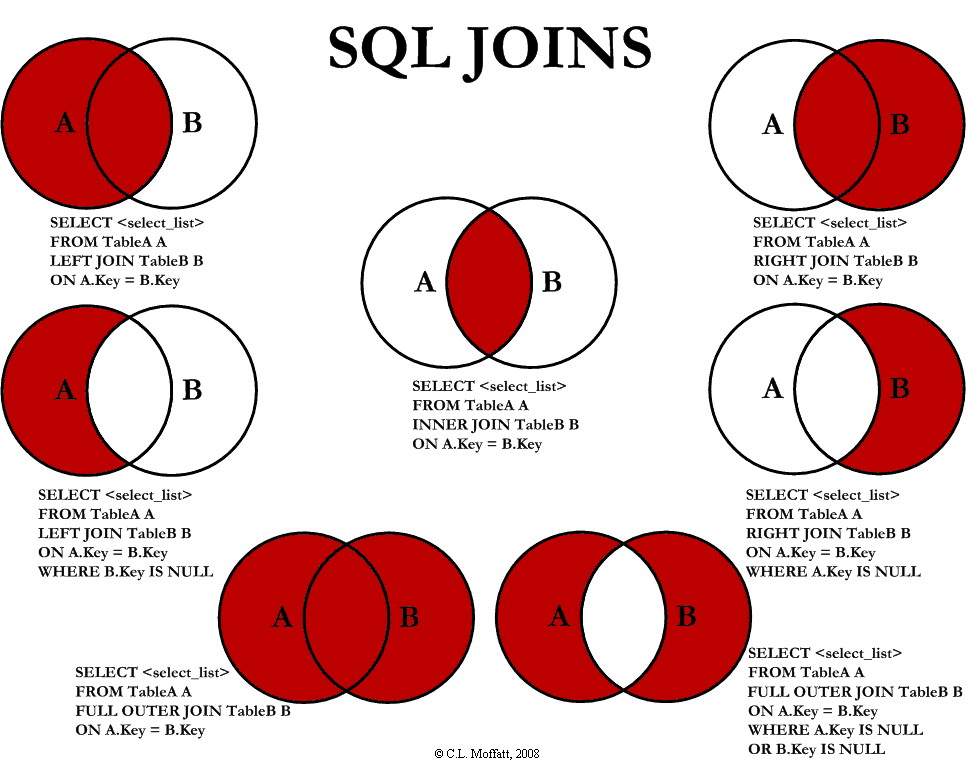

[This figure](https://stackoverflow.com/questions/17645968/sql-inner-join-multiple-tables-not-working-as-expected) ilustrates how joins work in SQL.

Similarly works for selecting 3 tables (example from W3Schools):
 >  sql = "SELECT users.name AS user, products.name AS favorite FROM users 
           LEFT JOIN products ON users.fav = products.id"

Other small things we can do with the Python+SQL is creating a new table within the selected Database, inserting the new data, order the values of the table, deleting (values and tables), and, updating it.

Since we have extracted the dataset we will use the advantage of using the pd.merge function. We want to join now three tables: country, region, and, location in order to obtain the location with the correct regions and countries.

In [318]:
df1a = df_region.merge(df_country[['Country_ID', 'Country', 'Region_ID']], on = 'Region_ID', how='left')
df1b = df1a.merge(df_location[['Location_ID', 'Address', 'PostalCode', 'City', 'State','Country_ID']], 
                               on = 'Country_ID', how = 'right')
df1b

,Region_ID,Region,Country_ID,Country,Location_ID,Address,PostalCode,City,State
0,2,Americas,US,United States of America,1400,2014 Jabberwocky Rd,26192,Southlake,Texas
1,2,Americas,US,United States of America,1500,2011 Interiors Blvd,99236,South San Francisco,California
2,2,Americas,US,United States of America,1700,2004 Charade Rd,98199,Seattle,Washington
3,2,Americas,CA,Canada,1800,147 Spadina Ave,M5V 2L7,Toronto,Ontario
4,1,Europe,UK,United Kingdom,2400,8204 Arthur St,None,London,None
5,1,Europe,UK,United Kingdom,2500,"Magdalen Centre, The Oxford Science Park",OX9 9ZB,Oxford,Oxford
6,1,Europe,DE,Germany,2700,Schwanthalerstr. 7031,80925,Munich,Bavaria


Now we merge the dataframes: jobs, departments, and, employees.

In [319]:
df2a = df_employee.merge(df_job[['Job_ID', 'Job', 'Min_Salary', 'Max_Salary']], on = 'Job_ID', how = 'left')
df2b = df2a.merge(df_department[['Department_ID', 'Department', 'Location_ID']], on = 'Department_ID', how = 'left')
df2b.head()

,Employee_ID,First_Name,Last_Name,email,Phone_Num,Hired_Date,Job_ID,Salary,Manager_ID,Department_ID,Job,Min_Salary,Max_Salary,Department,Location_ID
0,100,Steven,King,steven.king@sqltutorial.org,515.123.4567,1987-06-17,4,24000.0,NaN,9,President,20000.0,40000.0,Executive,1700
1,101,Neena,Kochhar,neena.kochhar@sqltutorial.org,515.123.4568,1989-09-21,5,17000.0,100.0,9,Administration Vice President,15000.0,30000.0,Executive,1700
2,102,Lex,De Haan,lex.de haan@sqltutorial.org,515.123.4569,1993-01-13,5,17000.0,100.0,9,Administration Vice President,15000.0,30000.0,Executive,1700
3,103,Alexander,Hunold,alexander.hunold@sqltutorial.org,590.423.4567,1990-01-03,9,9000.0,102.0,6,Programmer,4000.0,10000.0,IT,1400
4,104,Bruce,Ernst,bruce.ernst@sqltutorial.org,590.423.4568,1991-05-21,9,6000.0,103.0,6,Programmer,4000.0,10000.0,IT,1400


Now we merge the employees with the its place of work:

In [320]:
df3 = df2b.merge(df1b[['Location_ID', 'Address', 'PostalCode', 'City', 'State', 'Region_ID', 'Region', 'Country', 
                       'Country_ID']], on = 'Location_ID', how = 'left')
df3.head()

,Employee_ID,First_Name,Last_Name,email,Phone_Num,Hired_Date,Job_ID,Salary,Manager_ID,Department_ID,...,Department,Location_ID,Address,PostalCode,City,State,Region_ID,Region,Country,Country_ID
0,100,Steven,King,steven.king@sqltutorial.org,515.123.4567,1987-06-17,4,24000.0,NaN,9,...,Executive,1700,2004 Charade Rd,98199,Seattle,Washington,2,Americas,United States of America,US
1,101,Neena,Kochhar,neena.kochhar@sqltutorial.org,515.123.4568,1989-09-21,5,17000.0,100.0,9,...,Executive,1700,2004 Charade Rd,98199,Seattle,Washington,2,Americas,United States of America,US
2,102,Lex,De Haan,lex.de haan@sqltutorial.org,515.123.4569,1993-01-13,5,17000.0,100.0,9,...,Executive,1700,2004 Charade Rd,98199,Seattle,Washington,2,Americas,United States of America,US
3,103,Alexander,Hunold,alexander.hunold@sqltutorial.org,590.423.4567,1990-01-03,9,9000.0,102.0,6,...,IT,1400,2014 Jabberwocky Rd,26192,Southlake,Texas,2,Americas,United States of America,US
4,104,Bruce,Ernst,bruce.ernst@sqltutorial.org,590.423.4568,1991-05-21,9,6000.0,103.0,6,...,IT,1400,2014 Jabberwocky Rd,26192,Southlake,Texas,2,Americas,United States of America,US


Finally, we add on the dataframe all the dependents (in this case children):

In [321]:
df4 = df3.merge(df_dependent[['Dependent_ID', 'First_Name', 'Last_Name', 'Relationship','Employee_ID']], 
                  on = 'Employee_ID', how = 'left')
df4.head()

,Employee_ID,First_Name_x,Last_Name_x,email,Phone_Num,Hired_Date,Job_ID,Salary,Manager_ID,Department_ID,...,City,State,Region_ID,Region,Country,Country_ID,Dependent_ID,First_Name_y,Last_Name_y,Relationship
0,100,Steven,King,steven.king@sqltutorial.org,515.123.4567,1987-06-17,4,24000.0,NaN,9,...,Seattle,Washington,2,Americas,United States of America,US,4.0,Jennifer,King,Child
1,101,Neena,Kochhar,neena.kochhar@sqltutorial.org,515.123.4568,1989-09-21,5,17000.0,100.0,9,...,Seattle,Washington,2,Americas,United States of America,US,5.0,Johnny,Kochhar,Child
2,102,Lex,De Haan,lex.de haan@sqltutorial.org,515.123.4569,1993-01-13,5,17000.0,100.0,9,...,Seattle,Washington,2,Americas,United States of America,US,6.0,Bette,De Haan,Child
3,103,Alexander,Hunold,alexander.hunold@sqltutorial.org,590.423.4567,1990-01-03,9,9000.0,102.0,6,...,Southlake,Texas,2,Americas,United States of America,US,14.0,Vivien,Hunold,Child
4,104,Bruce,Ernst,bruce.ernst@sqltutorial.org,590.423.4568,1991-05-21,9,6000.0,103.0,6,...,Southlake,Texas,2,Americas,United States of America,US,15.0,Cuba,Ernst,Child


We can see that the repeated column names had been changed to the same name but with an x at the end for the employees and a y at the end for the depedent.

# Nivell 3

## Exercici 3: Genera algun gràfic que resumeixi les dades. 

We have done some dataframes by merging tables, but overall only 2 contained all/nearly all information of the database. The first one (df3) contains all the employees work information and the second (df4) it is the same but also contains if they have some person dependent on them, aka if they have children or a familiar with special needs (in this database it is only children).

By convenience, we will be using df4. Since we want to make an analysis on the location the employees work, position they hold and if they have children.

First, let's see our dataset:

In [322]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employee_ID    40 non-null     int64  
 1   First_Name_x   40 non-null     object 
 2   Last_Name_x    40 non-null     object 
 3   email          40 non-null     object 
 4   Phone_Num      34 non-null     object 
 5   Hired_Date     40 non-null     object 
 6   Job_ID         40 non-null     int64  
 7   Salary         40 non-null     float64
 8   Manager_ID     39 non-null     float64
 9   Department_ID  40 non-null     int64  
 10  Job            40 non-null     object 
 11  Min_Salary     40 non-null     float64
 12  Max_Salary     40 non-null     float64
 13  Department     40 non-null     object 
 14  Location_ID    40 non-null     int64  
 15  Address        40 non-null     object 
 16  PostalCode     39 non-null     object 
 17  City           40 non-null     object 
 18  State       

We can see that the columns on our dataset are:

- Employee_ID = ID of the employee
- First_Name_x = Name of the employee
- Last_Name_x = Last name of the employee
- email = Work email
- Phone_Number = Work phone number
- Hired_Date = Date in which the employee has been hired
- Job_ID = ID of the job
- Salary = Actual Salary of the employee
- Manager_ID = If the employee has a manager (not head of section/CEO) their Employee_ID.
- Department_ID = ID of the department they work. i.e. Executive, IT, etc.
- Job = Name of the position they have. i.e., CEO/president, programmer, Assistant, etc.
- Min/Max Salary = Minimum and Maximum salary allow for the place they work on the company.
- Department = Name of the department the employee works.
- Location_ID = ID of the work place.
- Dependent_ID = ID of the person dependent of the employee.  
- First_Name_y = Name of the dependent.
- Last_Name_y  = Last name of the dependent. 
- Relationship = Type of relationship of the dependent with the employee. I.e. wife/husband, parent, child, etc. In this dataset they are all children. 
- Address = Work place address. 
- PostalCode = Work place postal code. 
- City  = City of the Work place. 
- State = State of the work place. 
- Region_ID = ID of the continent/region.  
- Region = Continent, i.e., Europe, Americas, etc.
- Country = Name of the country.
- Country_ID = ID of the country. 

Before deleting the columns that end with ID we first will convert the Hired_Date into datetime and take a look at the nul values.

In [323]:
# convert the column Hired_Date into timedate:
df4['Hired_Date'] = pd.to_datetime(df4['Hired_Date'])

# check how many null values be have:
nulcol = df4.isnull().sum()
print('Values that are null:')
print(nulcol[nulcol > 0])

Values that are null:
Phone_Num        6
Manager_ID       1
PostalCode       1
State            1
Dependent_ID    10
First_Name_y    10
Last_Name_y     10
Relationship    10
dtype: int64


We can see there are values on Manager_ID and Dependent_ID, they don't interest us because these values will be erased since they are not interesting for our analysis. If we were to mantain them, we needed to know that for Manager_ID the null value correspond to the president/CEO, and the nulls on the dependents are for the employees that not have children.

We rewrite the NaN to 'None', since if there is no know a familiar with dependence we want it to appear in the analysis.

In [357]:
#First, let's see change the values for the Depedents from NaN to 'None':
df4['Dependent_ID'] = df4['Dependent_ID'].replace({np.nan:'None'})
df4['First_Name_y'] = df4['First_Name_y'].replace({np.nan:'None'})
df4['Last_Name_y'] = df4['Last_Name_y'].replace({np.nan:'None'})
df4['Relationship'] = df4['Relationship'].replace({np.nan:'None'})

The other null values are on Phone_Num that is not useful for our analysis thus we will not touch it. But we need to see which employees have the PostalCode and State in NaN value.

In [325]:
# print the null values on location of the office:
df4[df4[['State','PostalCode']].isnull().any(axis=1)]

,Employee_ID,First_Name_x,Last_Name_x,email,Phone_Num,Hired_Date,Job_ID,Salary,Manager_ID,Department_ID,...,City,State,Region_ID,Region,Country,Country_ID,Dependent_ID,First_Name_y,Last_Name_y,Relationship
36,203,Susan,Mavris,susan.mavris@sqltutorial.org,515.123.7777,1994-06-07,8,6500.0,101.0,4,...,London,None,1,Europe,United Kingdom,UK,13.0,Uma,Mavris,Child


In [326]:
df4.loc[36,['Manager_ID','Job','Location_ID', 'Address', 'City', 'State', 'PostalCode', 'Country']]

Manager_ID                              101.0
Job            Human Resources Representative
Location_ID                              2400
Address                        8204 Arthur St
City                                   London
State                                    None
PostalCode                               None
Country                        United Kingdom
Name: 36, dtype: object

In [327]:
indx = df4.index[df4['Employee_ID'] == 101].tolist()

df4.loc[indx, ['First_Name_x', 'Last_Name_x', 'Job', 'Department', 'Location_ID', 'City', 'Country']]

,First_Name_x,Last_Name_x,Job,Department,Location_ID,City,Country
1,Neena,Kochhar,Administration Vice President,Executive,1700,Seattle,United States of America


Seems that Susan Mavris, that don't have postal code neiter state it is a human resources representives that their manager is directly Neena Kochhar from the administration of the Vice President, Executive, and they work in US, in the principal branch.

We can see if Susan has more coworkers on London:

In [328]:
df4.loc[(df4['City']=='London')]

,Employee_ID,First_Name_x,Last_Name_x,email,Phone_Num,Hired_Date,Job_ID,Salary,Manager_ID,Department_ID,...,City,State,Region_ID,Region,Country,Country_ID,Dependent_ID,First_Name_y,Last_Name_y,Relationship
36,203,Susan,Mavris,susan.mavris@sqltutorial.org,515.123.7777,1994-06-07,8,6500.0,101.0,4,...,London,None,1,Europe,United Kingdom,UK,13.0,Uma,Mavris,Child


She is actually the only employee at the office at London. Thus we will rename the provice to: London, as it is done for the ones in Oxford.

In [329]:
df4.loc[df4.City == 'Oxford']

,Employee_ID,First_Name_x,Last_Name_x,email,Phone_Num,Hired_Date,Job_ID,Salary,Manager_ID,Department_ID,...,City,State,Region_ID,Region,Country,Country_ID,Dependent_ID,First_Name_y,Last_Name_y,Relationship
25,145,John,Russell,john.russell@sqltutorial.org,None,1996-10-01,15,14000.0,100.0,8,...,Oxford,Oxford,1,Europe,United Kingdom,UK,28.0,Woody,Russell,Child
26,146,Karen,Partners,karen.partners@sqltutorial.org,None,1997-01-05,15,13500.0,100.0,8,...,Oxford,Oxford,1,Europe,United Kingdom,UK,29.0,Alec,Partners,Child
27,176,Jonathon,Taylor,jonathon.taylor@sqltutorial.org,None,1998-03-24,16,8600.0,100.0,8,...,Oxford,Oxford,1,Europe,United Kingdom,UK,30.0,Sandra,Taylor,Child
28,177,Jack,Livingston,jack.livingston@sqltutorial.org,None,1998-04-23,16,8400.0,100.0,8,...,Oxford,Oxford,1,Europe,United Kingdom,UK,NaN,NaN,NaN,NaN
29,178,Kimberely,Grant,kimberely.grant@sqltutorial.org,None,1999-05-24,16,7000.0,100.0,8,...,Oxford,Oxford,1,Europe,United Kingdom,UK,NaN,NaN,NaN,NaN
30,179,Charles,Johnson,charles.johnson@sqltutorial.org,None,2000-01-04,16,6200.0,100.0,8,...,Oxford,Oxford,1,Europe,United Kingdom,UK,NaN,NaN,NaN,NaN


In [330]:
df4.loc[36,'State'] = 'London'
df4.loc[36,:]

Employee_ID                                 203
First_Name_x                              Susan
Last_Name_x                              Mavris
email              susan.mavris@sqltutorial.org
Phone_Num                          515.123.7777
Hired_Date                           1994-06-07
Job_ID                                        8
Salary                                   6500.0
Manager_ID                                101.0
Department_ID                                 4
Job              Human Resources Representative
Min_Salary                               4000.0
Max_Salary                               9000.0
Department                      Human Resources
Location_ID                                2400
Address                          8204 Arthur St
PostalCode                                 None
City                                     London
State                                    London
Region_ID                                     1
Region                                  

Before the analysis we will drop all values that contain an ID, but Employee_ID and Manager_ID.

In [331]:
df4.drop(['Job_ID', 'Department_ID', 'Location_ID', 'Region_ID', 'Country_ID', 'Dependent_ID']
         , axis=1, inplace=True)

In [332]:
df4.columns

Index(['Employee_ID', 'First_Name_x', 'Last_Name_x', 'email', 'Phone_Num',
       'Hired_Date', 'Salary', 'Manager_ID', 'Job', 'Min_Salary', 'Max_Salary',
       'Department', 'Address', 'PostalCode', 'City', 'State', 'Region',
       'Country', 'First_Name_y', 'Last_Name_y', 'Relationship'],
      dtype='object')

In [333]:
# first of all we describe our dataset, for this we will be using df4, since it is the complete dataset
print('Only numerical columns:')
df4.describe()

Only numerical columns:


,Employee_ID,Salary,Manager_ID,Min_Salary,Max_Salary
count,40.000000,40.000000,39.000000,40.000000,40.000000
mean,140.225000,8060.000000,110.282051,5740.000000,11650.000000
std,39.175141,4585.752741,22.887538,3827.752906,7388.660751
min,100.000000,2500.000000,100.000000,2000.000000,5000.000000
25%,109.750000,4700.000000,100.000000,4000.000000,8500.000000
50%,119.500000,7750.000000,102.000000,4200.000000,9000.000000
75%,178.250000,9250.000000,111.000000,6000.000000,12000.000000
max,206.000000,24000.000000,205.000000,20000.000000,40000.000000


In [334]:
print('All columns:\n')
df4.describe(include='all')

All columns:



,Employee_ID,First_Name_x,Last_Name_x,email,Phone_Num,Hired_Date,Salary,Manager_ID,Job,Min_Salary,...,Department,Address,PostalCode,City,State,Region,Country,First_Name_y,Last_Name_y,Relationship
count,40.000000,40,40,40,34,40,40.000000,39.000000,40,40.000000,...,40,40,39,40,40,40,40,30,30,30
unique,NaN,37,40,40,34,37,NaN,NaN,19,NaN,...,11,7,6,7,7,2,4,29,30,1
top,NaN,Karen,King,steven.king@sqltutorial.org,515.123.4567,1994-06-07,NaN,NaN,Programmer,NaN,...,Shipping,2004 Charade Rd,98199,Seattle,Washington,Americas,United States of America,Sandra,King,Child
freq,NaN,2,1,1,1,4,NaN,NaN,5,NaN,...,7,18,18,18,18,32,30,2,1,30
mean,140.225000,NaN,NaN,NaN,NaN,NaN,8060.000000,110.282051,NaN,5740.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,39.175141,NaN,NaN,NaN,NaN,NaN,4585.752741,22.887538,NaN,3827.752906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100.000000,NaN,NaN,NaN,NaN,NaN,2500.000000,100.000000,NaN,2000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,109.750000,NaN,NaN,NaN,NaN,NaN,4700.000000,100.000000,NaN,4000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,119.500000,NaN,NaN,NaN,NaN,NaN,7750.000000,102.000000,NaN,4200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,178.250000,NaN,NaN,NaN,NaN,NaN,9250.000000,111.000000,NaN,6000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
reg = df4.groupby(['Region'])['Region'].count()
countr = df4.groupby(['Country'])['Country'].count()
citst = df4.groupby(['City', 'State'])['City'].count()

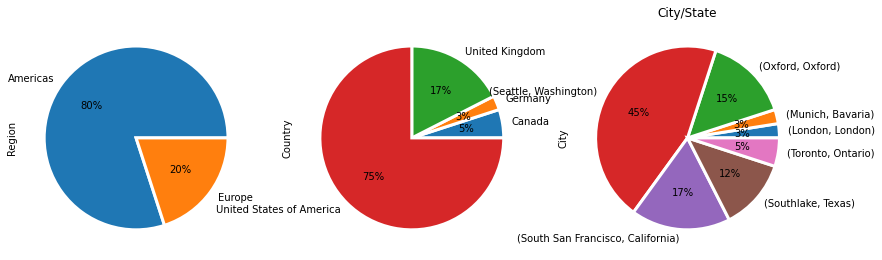

In [382]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,10))

# Label distance: gives the space between labels and the center of the pie
reg.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },ax=axes[0])
plt.title('Regions')

countr.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[1])
plt.title('Countries')

citst.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[2])
plt.title('City/State')
plt.show()

The employees of this business are mainly from Americas, in particular, from the Seattle (Washington) on the US, there is 45% of employees,  12% are on the offices in Southlake (Texas), an a 17% in South San Francisco in California. In the American continent there are, also, offices in Toronto (Ontario/Canada), a 5%. There is a 20% of the workers are on the offices in Europe, in particular on United Kingdom in Oxford (Oxford) there work 15% of the employees, and 3% works in London. The last 3% work in the offices on Munich (Bavaria) on Germany.

Dates of the employees hired and the positions they actual hold:

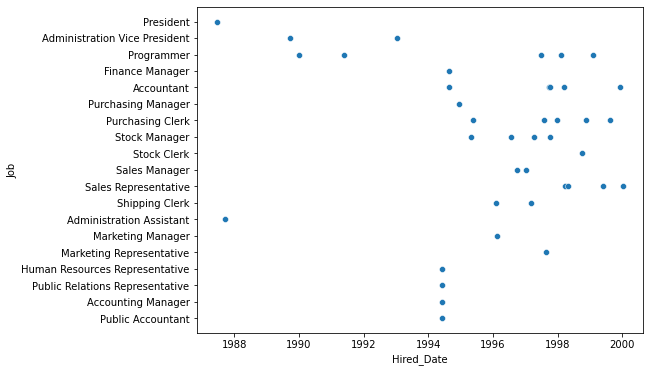

In [337]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df4, x='Hired_Date', y='Job');
plt.show()

We can see that the first positions to filled were the president and the administration assistant. The last positions to become filled had been the ones that go from Programmer to Shipping Clerk. We can assume also, that these positions hold the youngest people, and it is possible that they would not have dependents (children).

Let's take a look to the salaries of employees based in jobs and in departments:

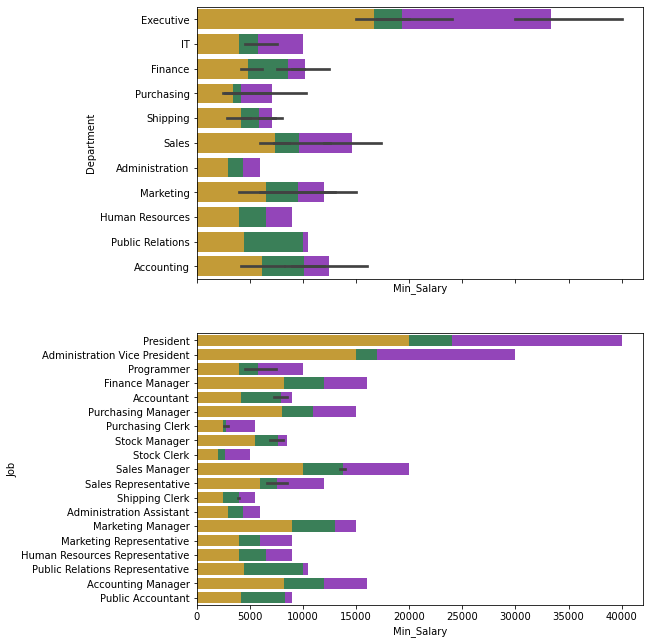

In [338]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,11), sharex=True)
p1 = sns.barplot(data=df4, x='Max_Salary', y='Department', color = 'darkorchid', ax=axes[0])
p2 = sns.barplot(data=df4, x='Salary', y='Department', color = 'seagreen', ax=axes[0])
p3 = sns.barplot(data=df4, x='Min_Salary', y='Department', color = 'goldenrod', ax=axes[0])

s1 = sns.barplot(data=df4, x='Max_Salary', y='Job', color = 'darkorchid', ax=axes[1]) #max salary
s2 = sns.barplot(data=df4, x='Salary', y='Job', color = 'seagreen', ax=axes[1]) #actual salary
s3 = sns.barplot(data=df4, x='Min_Salary', y='Job', color = 'goldenrod', ax=axes[1]) #min
plt.show()

We can see that the largerst salaries are the executives ones, that correpond to the CEO and Vice presidents. Followed by the departments of Accounting and Sales. The jobs on where an employee is Manager are, also, higher than non-manager positions.

Now we can ask, it is possible that the positions with better salaries had also children/dependents?

Now, let's check how many children has each worker:

> Remember: Last_Name_x = employee last name, Last_name_y = child last name

In [339]:
df4.groupby(['Last_Name_x', 'Last_Name_y'])['Last_Name_x'].count()

Last_Name_x  Last_Name_y
Austin       Austin         1
Baer         Baer           1
Baida        Baida          1
Chen         Chen           1
Colmenares   Colmenares     1
De Haan      De Haan        1
Ernst        Ernst          1
Faviet       Faviet         1
Fay          Fay            1
Gietz        Gietz          1
Greenberg    Greenberg      1
Hartstein    Hartstein      1
Higgins      Higgins        1
Himuro       Himuro         1
Hunold       Hunold         1
Khoo         Khoo           1
King         King           1
Kochhar      Kochhar        1
Lorentz      Lorentz        1
Mavris       Mavris         1
Partners     Partners       1
Pataballa    Pataballa      1
Popp         Popp           1
Raphaely     Raphaely       1
Russell      Russell        1
Sciarra      Sciarra        1
Taylor       Taylor         1
Tobias       Tobias         1
Urman        Urman          1
Whalen       Whalen         1
Name: Last_Name_x, dtype: int64

In this dataset the workers only have one child!

So, let's see the percentages of dependents in the company, which position they hold and where they live.

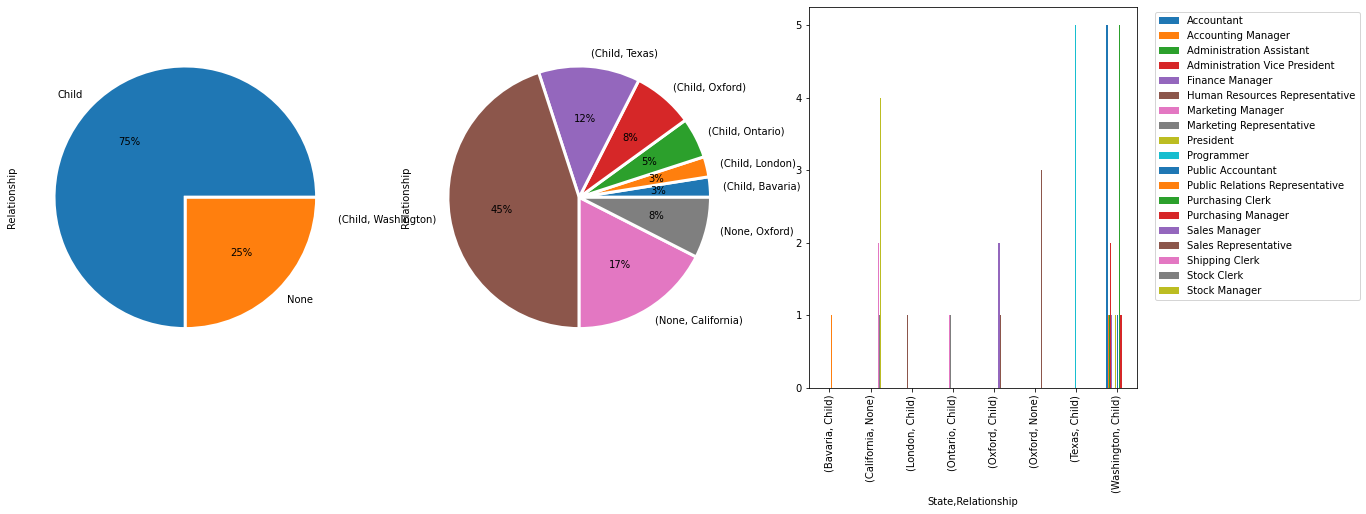

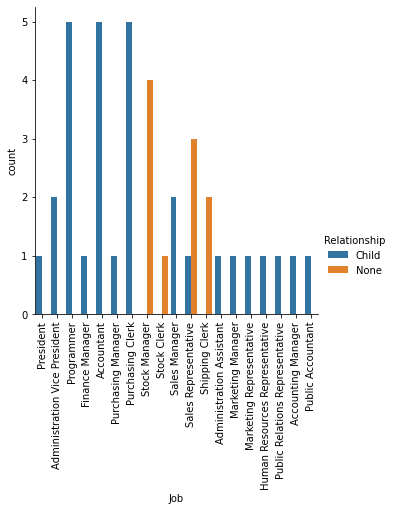

In [390]:
kids = df4.groupby(['Relationship'])['Relationship'].count()
kid2s = df4.groupby(['Relationship', 'State'])['Relationship'].count()
statpos = pd.crosstab([df4.State, df4.Relationship],[df4.Job])
#print(statpos)

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))

g1 = kids.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[0])
#plt.title('Percentage of employees that have children')
g1b = kid2s.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[1])


g2 = statpos.plot(kind='bar', rot=90, ax=axes[2])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

g3 = sns.catplot(data=df4, kind='count', x ='Job', hue='Relationship')
plt.xticks(rotation=90)

plt.show()

There is a 25% of the workers that don't have children, they work as Stock managers, followed by Sales representatives, Shipping clerks and Stock clerks. These are all jobs that as we have seen are occupied by young employees. Also, we can see, in the top panel 3rd graph, that these jobs are on California (Stock Manager, Stock Clerk and Shipping Clerk) and in Oxford (Sales Representative). The workers, a part from the Sales Representatives also have the lowest salaries.

There is also an anomaly, in Purchasing clerks, that have the lowest salaries of all company and also they are young employees they have children.

Thus the other 75% of employees have children, they salaries may vary, but they tend to be higher than the ones in the "childess" positions, they also tend to have more time working in the company and thus tend to be much older. 